# TME 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [6]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)

inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [7]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int32
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [8]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [9]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [10]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [11]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [12]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [13]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [14]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [15]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [16]:
from PIL import image

# reading an image and convert to array
myimage = np.array(Image.open('image.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('image.jpg')

ImportError: cannot import name 'image' from 'PIL' (C:\Users\msalais\Anaconda3\lib\site-packages\PIL\__init__.py)

Array can be displayed as an image using Matplotlib module (https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html#sphx-glr-gallery-images-contours-and-fields-image-demo-py). 

In [17]:
import matplotlib.pyplot as plt

plt.imshow(myimage)
plt.show()

NameError: name 'myimage' is not defined

## Exercice 1
In this exercice, we work with image `img/moon.tif`. Try to not use loops (for, while, ...) to visit elements of an array (if you don't know, use loop, the answer will be given the next week).

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values and the image size (number of lines and number of columns).

In [105]:
from PIL import Image
import numpy as np

def openImage(fname):
    myimage = np.array(Image.open(fname))
    return myimage

[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


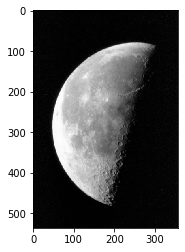

In [200]:
Imoon = openImage('img/moon.tif')
print(Imoon)
plt.figure()
plt.gray()
plt.imshow(Imoon)
plt.show()

2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [132]:
def countPixelsVersionMoche(I,k):
    """ Array*int -> int"""
    nb_occ = 0
    depth = np.shape(I)[0]
    width = np.shape(I)[1]
    for i in range(depth):
        for j in range (width):
            if I[i, j] == k:
                nb_occ = nb_occ + 1
    
    return nb_occ

def countPixels(I,k):
    nb_occ = np.where(I==k, 1, 0).sum()
    return nb_occ

In [196]:
print(countPixels(Imoon,0))

1459


3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [133]:
def replacePixelsVersionMoche(I,k1,k2):
    N = np.copy(I)
    for i in range (np.shape(N)[0]):
        for j in range (np.shape(N)[1]):
            if I[i,j] == k1:
                N[i,j] = k2
    return N

def replacePixels(I,k1,k2):
    N = np.copy(I)
    return np.where(N==k1, k2, N)

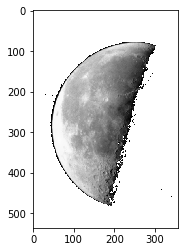

In [134]:
Jreplace = np.copy(Imoon)
for i in range(20):
    Jreplace = replacePixels(Jreplace,i,255)   
#replacing a single pixel value does not make
#any sense for a human reader

plt.figure()
plt.imshow(Jreplace)
plt.show()

4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

In [135]:
def normalizeImage(I,k1,k2):
    N = np.copy(I)
    N = np.around(N*((k2-k1+1)/255))
    N = np.where(N<k1, k1, N)
    N = np.where(N>k2, k2, N)
    return N

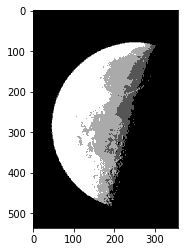

In [136]:
Jnormal = normalizeImage(Imoon,0,3)
plt.figure()
plt.imshow(Jnormal)
plt.show()

5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

In [137]:
def inverteImage(I):
    N = np.copy(I)
    N = np.around(255-N)
    return N

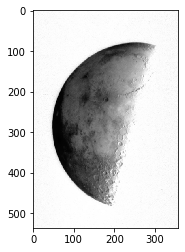

In [138]:
Jinvert = inverteImage(Imoon)
plt.figure()
plt.imshow(Jinvert)
plt.show()

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [139]:
def computeHistogram(I):
    #x = np.arange(255)
    hist = np.empty(256)
    for i in range (256):
        hist[i] = countPixels(I,i)
    return hist
        
# use comments to answer to a verbal question
# The numpy np.where and np.sum methods allow 
# one to perform computations (especially 
# value counts) on an array while staying away 
# from explicit, memory-consuming loops.

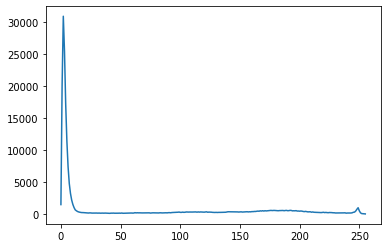

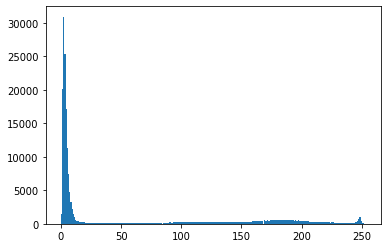

In [140]:
import matplotlib.pyplot as plt

histfirst = computeHistogram(Imoon)
plt.plot(histfirst)
plt.show()

#Checkup on histogram's correctness
hist1, hist2 = np.histogram(Imoon,256)
plt.figure()
plt.hist(hist2[:-1],hist2,weights=hist1)
plt.show()

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

In [141]:
def thresholdImage(I,s):
    N = np.copy(I)
    N = np.where(N<s,0,N)
    N = np.where(N>=s,255,N)
    return N

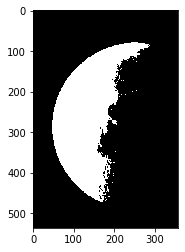

In [142]:
Jshold = thresholdImage(Imoon,127)
plt.figure()
plt.imshow(Jshold)
plt.show()

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

Image values
 [[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


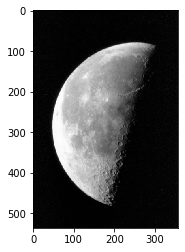

Plot moon's histogram


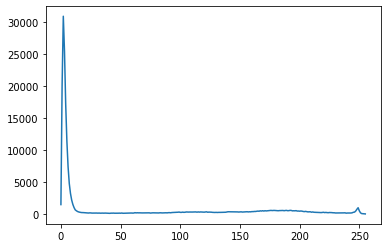

Show moon's inverse


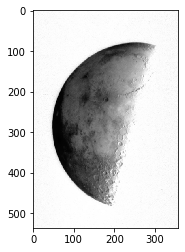

Show moon's new histogram


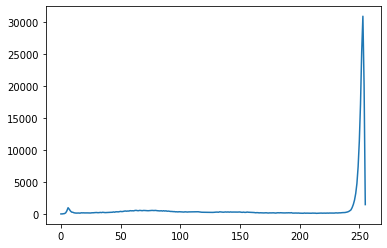

In [147]:
Imoon = openImage('img/moon.tif')
print("Image values\n",Imoon)
plt.figure()
plt.gray()
plt.imshow(Imoon)
plt.show()

print("Plot moon's histogram")
histfirst = computeHistogram(Imoon)
plt.figure()
plt.plot(histfirst)
plt.show()

print("Show moon's inverse")
Jinvert = inverteImage(Imoon)
plt.figure()
plt.imshow(Jinvert)
plt.show()

print("Show moon's new histogram")
histinvert = computeHistogram(Jinvert)
plt.figure()
plt.plot(histinvert)
plt.show()

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

Image values
 [[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


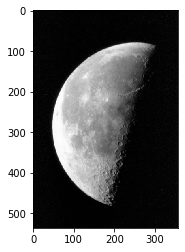

Plot moon's histogram


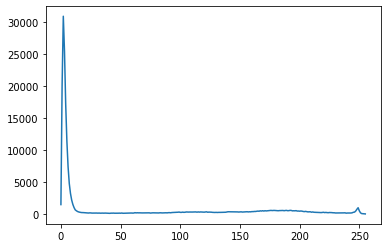

Moon looking normal-er


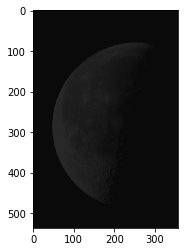

Histogram normalised


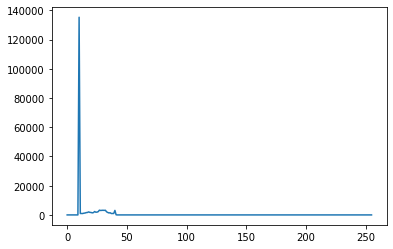

Zoom-in addendum


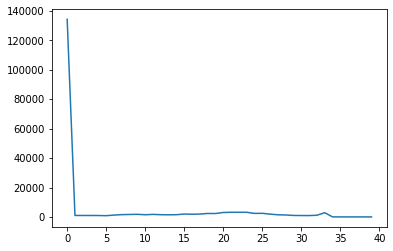

In [152]:
Imoon = openImage('img/moon.tif')
print("Image values\n",Imoon)
plt.figure()
plt.gray()
plt.imshow(Imoon)
plt.show()

print("Plot moon's histogram")
histfirst = computeHistogram(Imoon)
plt.figure()
plt.plot(histfirst)
plt.show()

print("Moon looking normal-er")
Jnormal = normalizeImage(Imoon,10,50)
plt.figure()
plt.imshow(Jnormal, vmin=0, vmax=255)
plt.show()

print("Histogram normalised")
histnorm = computeHistogram(Jnormal)
plt.figure()
plt.plot(histnorm)
plt.show()

print("Zoom-in addendum")
hist_red = hist_norm[10:50]
plt.plot(hist_red)
plt.show()

10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

Image values
 [[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


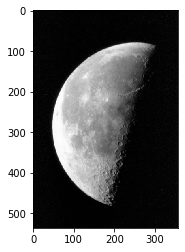

Plot moon's histogram


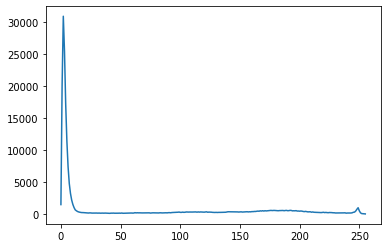

Moon trespassing thresholds


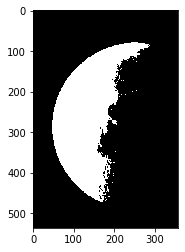

Histogram with thresholds


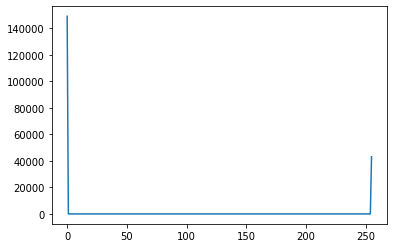

In [154]:
Imoon = openImage('img/moon.tif')
print("Image values\n",Imoon)
plt.figure()
plt.gray()
plt.imshow(Imoon)
plt.show()

print("Plot moon's histogram")
histfirst = computeHistogram(Imoon)
plt.figure()
plt.plot(histfirst)
plt.show()

print("Moon trespassing thresholds")
Jshold = thresholdImage(I,127)
plt.figure()
plt.imshow(Jshold)
plt.show()

print("Histogram with thresholds")
plt.figure()
histshold = computeHistogram(Jshold)
plt.plot(histshold)
plt.show()

## Exercice 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image:
<div>
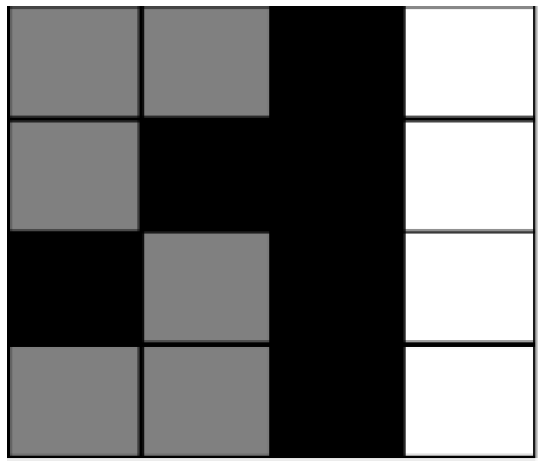
</div>
Black pixels have the value 0, white pixels the value 255, and grey pixels the value 127. Display the image using `imshow()` and plot the histogram.


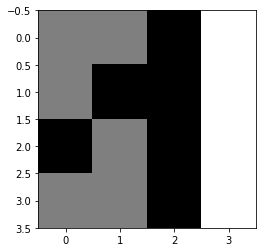

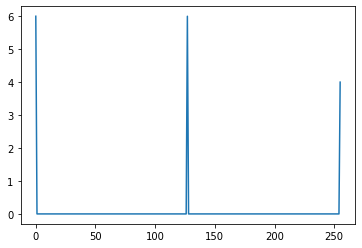

In [156]:
Isquare = np.array([[127, 127, 0, 255],
                [127, 0, 0, 255],
                [0, 127, 0, 255],
                [127, 127, 0, 255]])
plt.figure()
plt.imshow(Isquare)
plt.show()

squarehist = computeHistogram(Isquare)
plt.plot(squarehist)
plt.show()

2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

[[ 56. 135. 170. ... 176.  42.  52.]
 [ 40. 196.  31. ...  51. 251. 229.]
 [ 15. 159. 101. ...  25.  80.  47.]
 ...
 [ 69. 176. 225. ...  44.  14.  36.]
 [255. 149.  94. ...  43.  75.  37.]
 [156.  87. 114. ...  74.  73. 167.]]
[[128. 128. 144. ... 112. 112. 128.]
 [160. 144. 128. ... 144. 144. 112.]
 [128. 144. 128. ...  96. 144. 128.]
 ...
 [112. 128.  96. ... 144. 128. 144.]
 [112. 128. 144. ... 128. 144. 160.]
 [144. 128. 160. ... 128. 144. 112.]]


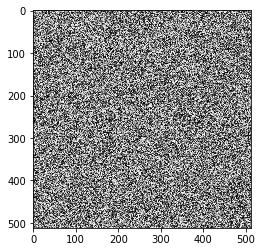

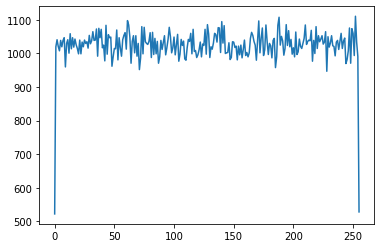

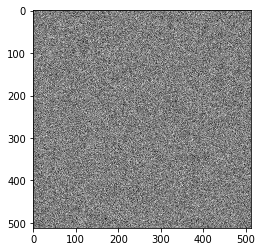

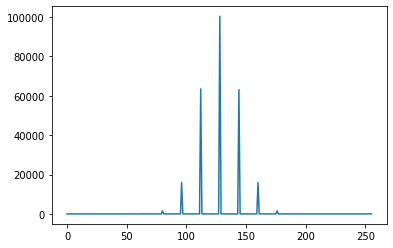

In [201]:
plancheu = np.around(np.random.rand(512,512)*255)
planchen = np.around(np.random.randn(512,512))*16+128

print(plancheu)
print(planchen)

plt.figure()
plt.imshow(plancheu)
plt.show()

histu = computeHistogram(plancheu)
plt.figure()
plt.plot(histu)
plt.show()

plt.figure()
plt.imshow(planchen)
plt.show()

histn = computeHistogram(planchen)
plt.figure()
plt.plot(histn)
plt.show()

# Both programs generate some kind of background "noise". The histograms,
# however, show major differences in shape, which means that the color 
# repartition is radically different.
# Noise is quite homogenous when drawn from the normal distribution. 
# Contrast is then sharper when rand() is used, since pixels can take 
# up any value in the full color range, including sound blacks and whites.
# rand() shows what might happen when one decides to equalise a histogram,
# whatever the initial image is, therefore augmenting the chances to reach 
# a readable, clear display.

## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.tif`. 
1. Read and diplay this image

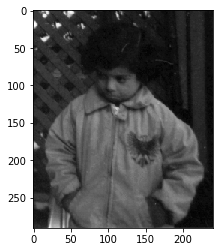

In [203]:
Igrognon = openImage('img/pout.tif')
plt.gray()
plt.imshow(Igrognon)
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

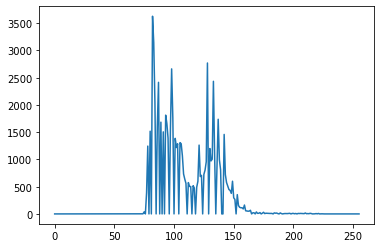

In [202]:
histinit = computeHistogram(Igrognon)
plt.plot(histinit)
plt.show()

# It looks like the maximum pixel value for this picture 
# is 160, while the minimum is 70. It hence only covers 
# (160-70)/256 = 35% of the allowed range.
# The most significative portion of the histogram also 
# shows gaps, discontinuities in pixel repartition, which 
# means that it only uses an even smaller, very restrained 
# dynamics range. This is usually linked to poor quality. 
# On the other hand, most values seem to be condensed around 
# 75, which explains why the whole display feels so dark.

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.tif` and discuss the result.

In [195]:
def histogramEqualization(I,h):
    H_c = np.zeros((256))
    equal = np.copy(I)
    H_c[0] = h[0]
    equal = np.where(equal==0,(255.0/(I.shape[0]*I.shape[1])*H_c[0]), equal) 
    for i in range (1,256):
        H_c[i] = H_c[i-1] + h[i]
        ip = (255.0/(I.shape[0]*I.shape[1])*H_c[i])
        equal = np.where(equal==i, ip, equal)
    return equal

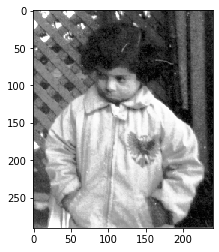

In [204]:
Jegal = histogramEqualization(Igrognon,histinit)
plt.figure()
plt.imshow(Jegal)
plt.show()

# Sharing out the pixels on the full dynamics range 
# helps the reader mark out the limits of the 
# objects represented. Fair tints seem whiter, while 
# the dark keeps away from the details.
# Hues that were once packed in the lower end of the 
# range are now spread out for a harmonious render.
# Due to better readability, "pixellisation" (poor 
# quality) in the resource file seems, nonetheless, 
# more evident. 